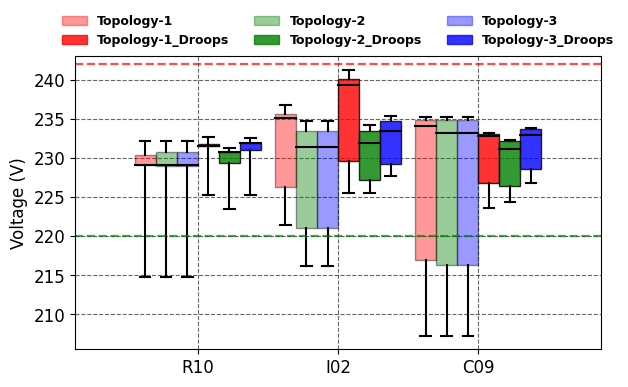

In [1]:
## Working OK --- Buses linked to VSC at the end of each feeder -- case-3  -- Fig.8
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr
from matplotlib.colors import to_rgba


# Define parameters
selected_buses = ['R10', 'I02', 'C09']

#Improved color -  just color names
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'red', 'Topology-2_Droops': 'green', 'Topology-3_Droops': 'blue'
}

file_names = [
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv',
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',

]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6.5, 4)) #Increased figure size for better legend visibility

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        alpha = 0.4 if '_Droops' not in mapped_scenario else 0.8 # Conditional alpha

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=alpha)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    alpha = 0.4 if '_Droops' not in scenario else 0.8 # Conditional alpha for legend too
    handle = mpatches.Patch(color=to_rgba(topology_colors[scenario], alpha=alpha), label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3, frameon=False, prop={'size': 9, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontsize=12)
ax.set_ylabel('Voltage (V)', fontsize=12)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6, alpha=0.7)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6, alpha=0.7)  # Min limit voltage

ax.tick_params(axis='y', labelsize=12)


ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()

# Save the figure with high resolution at the specified path
plt.savefig(r'E:\PhD\New folder\Figures\box\Voltage+Cureent\VOLTAGE - Copy - Copy\fig.8.png', dpi=400)

plt.show()

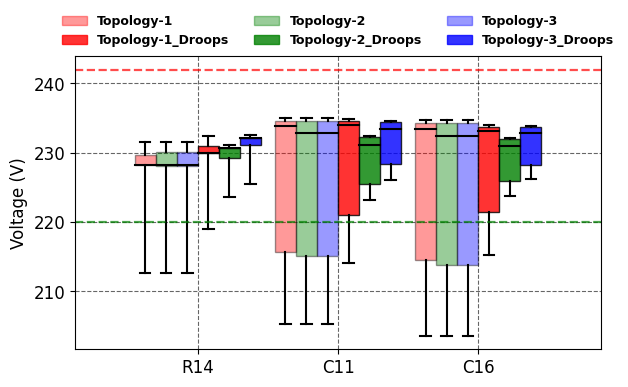

In [2]:
## Working OK-- case-3  -- Fig.9
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr
from matplotlib.colors import to_rgba


# Define parameters
selected_buses = ['R14', 'C11', 'C16']

#Improved color -  just color names
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'red', 'Topology-2_Droops': 'green', 'Topology-3_Droops': 'blue'
}

file_names = [
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv',
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',

]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6.5, 4)) #Increased figure size for better legend visibility

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        alpha = 0.4 if '_Droops' not in mapped_scenario else 0.8 # Conditional alpha

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=alpha)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    alpha = 0.4 if '_Droops' not in scenario else 0.8 # Conditional alpha for legend too
    handle = mpatches.Patch(color=to_rgba(topology_colors[scenario], alpha=alpha), label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3, frameon=False, prop={'size': 9, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontsize=12)
ax.set_ylabel('Voltage (V)', fontsize=12)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6, alpha=0.7)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6, alpha=0.7)  # Min limit voltage

ax.tick_params(axis='y', labelsize=12)


ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()

# Save the figure with high resolution at the specified path
plt.savefig(r'E:\PhD\New folder\Figures\box\Voltage+Cureent\VOLTAGE - Copy - Copy\fig.9.png', dpi=400)

plt.show()

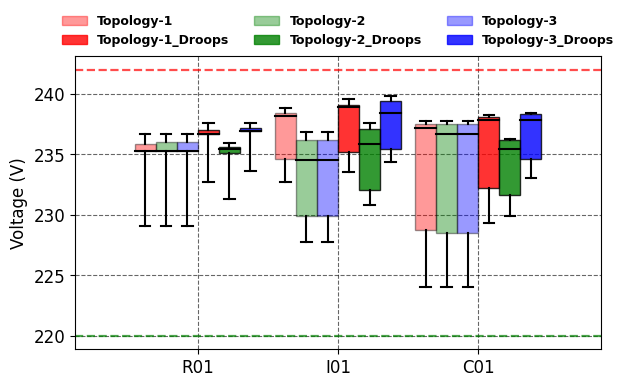

In [3]:
## Working OK-- First Buses of each feeder -- case-3  -- Fig.10
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr
from matplotlib.colors import to_rgba


# Define parameters
selected_buses = ['R01', 'I01', 'C01']

#Improved color -  just color names
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'red', 'Topology-2_Droops': 'green', 'Topology-3_Droops': 'blue'
}

file_names = [
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv',
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',

]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6.5, 4)) #Increased figure size for better legend visibility

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        alpha = 0.4 if '_Droops' not in mapped_scenario else 0.8 # Conditional alpha

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=alpha)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    alpha = 0.4 if '_Droops' not in scenario else 0.8 # Conditional alpha for legend too
    handle = mpatches.Patch(color=to_rgba(topology_colors[scenario], alpha=alpha), label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3, frameon=False, prop={'size': 9, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontsize=12)
ax.set_ylabel('Voltage (V)', fontsize=12)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6, alpha=0.7)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6, alpha=0.7)  # Min limit voltage

ax.tick_params(axis='y', labelsize=12)


ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()

# Save the figure with high resolution at the specified path
plt.savefig(r'E:\PhD\New folder\Figures\box\Voltage+Cureent\VOLTAGE - Copy - Copy\fig.10.png', dpi=400)

plt.show()

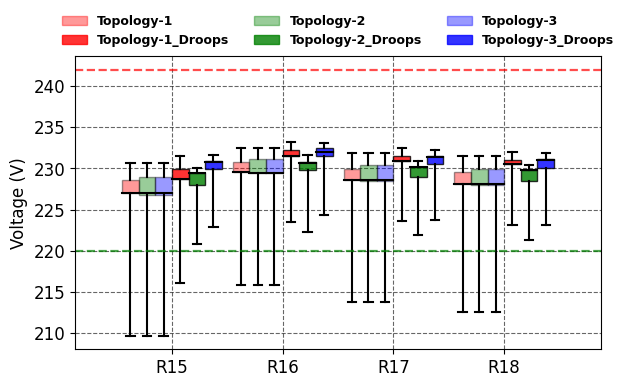

In [4]:
## Working OK--- case-3  -- Fig.11
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr
from matplotlib.colors import to_rgba


# Define parameters
selected_buses = ['R15', 'R16', 'R17', 'R18']

#Improved color -  just color names
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'red', 'Topology-2_Droops': 'green', 'Topology-3_Droops': 'blue'
}

file_names = [
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv',
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',

]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6.5, 4)) #Increased figure size for better legend visibility

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        alpha = 0.4 if '_Droops' not in mapped_scenario else 0.8 # Conditional alpha

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=alpha)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    alpha = 0.4 if '_Droops' not in scenario else 0.8 # Conditional alpha for legend too
    handle = mpatches.Patch(color=to_rgba(topology_colors[scenario], alpha=alpha), label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3, frameon=False, prop={'size': 9, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontsize=12)
ax.set_ylabel('Voltage (V)', fontsize=12)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6, alpha=0.7)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6, alpha=0.7)  # Min limit voltage

ax.tick_params(axis='y', labelsize=12)


ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()

# Save the figure with high resolution at the specified path
plt.savefig(r'E:\PhD\New folder\Figures\box\Voltage+Cureent\VOLTAGE - Copy - Copy\fig.11.png', dpi=400)

plt.show()

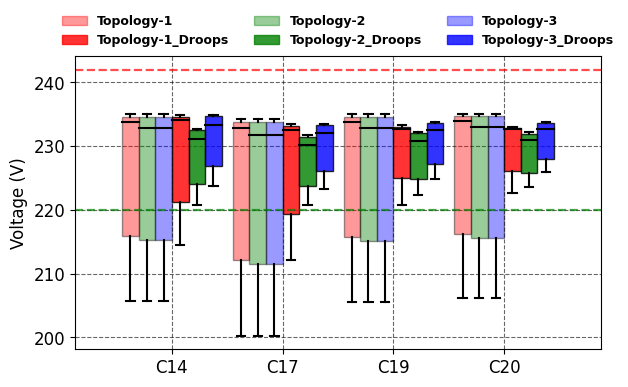

In [5]:
## Working OK--- case-3  -- Fig.12
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr
from matplotlib.colors import to_rgba


# Define parameters
selected_buses = ['C14', 'C17', 'C19', 'C20']

#Improved color -  just color names
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'red', 'Topology-2_Droops': 'green', 'Topology-3_Droops': 'blue'
}

file_names = [
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv',
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',

]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6.5, 4)) #Increased figure size for better legend visibility

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        alpha = 0.4 if '_Droops' not in mapped_scenario else 0.8 # Conditional alpha

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=alpha)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    alpha = 0.4 if '_Droops' not in scenario else 0.8 # Conditional alpha for legend too
    handle = mpatches.Patch(color=to_rgba(topology_colors[scenario], alpha=alpha), label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3, frameon=False, prop={'size': 9, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontsize=12)
ax.set_ylabel('Voltage (V)', fontsize=12)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6, alpha=0.7)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6, alpha=0.7)  # Min limit voltage

ax.tick_params(axis='y', labelsize=12)


ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()

# Save the figure with high resolution at the specified path
plt.savefig(r'E:\PhD\New folder\Figures\box\Voltage+Cureent\VOLTAGE - Copy - Copy\fig.12.png', dpi=400)

plt.show()

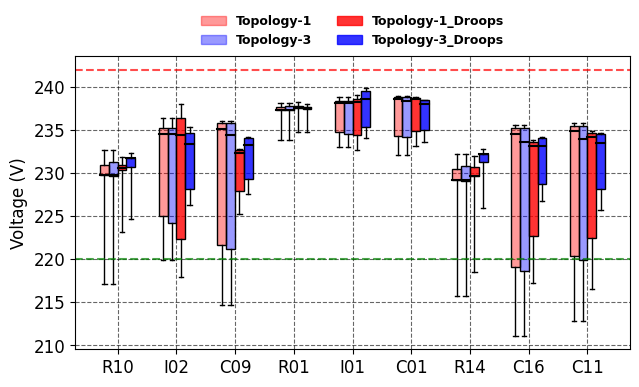

In [6]:
## Working OK --- Buses of case-1 Fig.14
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.colors import to_rgba

# Define parameters
selected_buses = ['R10', 'I02', 'C09','R01', 'I01', 'C01', 'R14', 'C16', 'C11']

# Define colors and topology mapping
topology_colors = {
    'Topology-1': 'red', 
    'Topology-3': 'blue',
    'Topology-1_Droops': 'red', 
    'Topology-3_Droops': 'blue'
}

file_names = [
    'voltage_Without_Droop_T1_case1.csv',
    'voltage_Without_Droop_T3_case1.csv',
    'voltage_With_Droop_T1_case1.csv',
    'voltage_With_Droop_T3_case1.csv'
]

def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])
        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

# Corrected scenario mapping for case1
scenario_mapping = {
    'With_Droop_T1_case1': 'Topology-1_Droops',
    'With_Droop_T3_case1': 'Topology-3_Droops',
    'Without_Droop_T1_case1': 'Topology-1',
    'Without_Droop_T3_case1': 'Topology-3'
}

fig, ax = plt.subplots(figsize=(6.5, 4))
width = 0.15  # Width for each box
positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    # Calculate positions for each scenario group
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario, 'gray')
        alpha = 0.8 if '_Droops' in mapped_scenario else 0.4

        box = ax.boxplot(voltages, positions=[bus_positions[j]], 
                         widths=width, patch_artist=True, 
                         showfliers=False, whis=100000)
        plt.setp(box['boxes'], facecolor=to_rgba(color, alpha=alpha), edgecolor='black')
        plt.setp(box['medians'], color='black', linewidth=1.5)

# Custom legend handling
legend_order = sorted(topology_colors.keys(), key=lambda x: ('_Droops' in x, x))
legend_handles = [
    mpatches.Patch(
        color=to_rgba(topology_colors[key], alpha=0.8 if '_Droops' in key else 0.4),
        label=key  # Directly use the key without replacement
    ) for key in legend_order
]

ax.legend(
    handles=legend_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.18),
    ncol=2,
    frameon=False,
    prop={'size': 9, 'weight': 'bold'}
)

ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) - 1) / 2)
ax.set_xticklabels(selected_buses, fontsize=12)
ax.set_ylabel('Voltage (V)', fontsize=12)
ax.axhline(242, color='r', linestyle='--', alpha=0.7)
ax.axhline(220, color='g', linestyle='--', alpha=0.7)
ax.tick_params(axis='y', labelsize=12)
ax.grid(linestyle='--', color='black', alpha=0.6)  # Added explicit grid color
plt.tight_layout()

# Save the figure with high resolution at the specified path
plt.savefig(r'E:\PhD\New folder\Figures\box\Voltage+Cureent\VOLTAGE - Copy - Copy\fig.14.png', dpi=400)

plt.show()

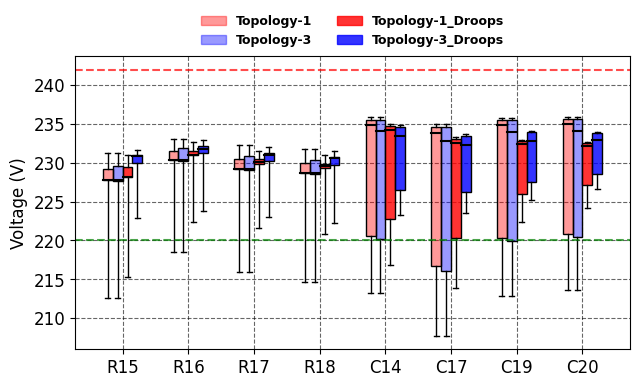

In [7]:
## Working OK --- Buses of case-1 Fig.15
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.colors import to_rgba

# Define parameters
selected_buses = ['R15', 'R16', 'R17','R18', 'C14', 'C17', 'C19', 'C20']

# Define colors and topology mapping
topology_colors = {
    'Topology-1': 'red', 
    'Topology-3': 'blue',
    'Topology-1_Droops': 'red', 
    'Topology-3_Droops': 'blue'
}

file_names = [
    'voltage_Without_Droop_T1_case1.csv',
    'voltage_Without_Droop_T3_case1.csv',
    'voltage_With_Droop_T1_case1.csv',
    'voltage_With_Droop_T3_case1.csv'
]

def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])
        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

# Corrected scenario mapping for case1
scenario_mapping = {
    'With_Droop_T1_case1': 'Topology-1_Droops',
    'With_Droop_T3_case1': 'Topology-3_Droops',
    'Without_Droop_T1_case1': 'Topology-1',
    'Without_Droop_T3_case1': 'Topology-3'
}

fig, ax = plt.subplots(figsize=(6.5, 4))
width = 0.15  # Width for each box
positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    # Calculate positions for each scenario group
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario, 'gray')
        alpha = 0.8 if '_Droops' in mapped_scenario else 0.4

        box = ax.boxplot(voltages, positions=[bus_positions[j]], 
                         widths=width, patch_artist=True, 
                         showfliers=False, whis=100000)
        plt.setp(box['boxes'], facecolor=to_rgba(color, alpha=alpha), edgecolor='black')
        plt.setp(box['medians'], color='black', linewidth=1.5)

# Custom legend handling
legend_order = sorted(topology_colors.keys(), key=lambda x: ('_Droops' in x, x))
legend_handles = [
    mpatches.Patch(
        color=to_rgba(topology_colors[key], alpha=0.8 if '_Droops' in key else 0.4),
        label=key  # Directly use the key without replacement
    ) for key in legend_order
]

ax.legend(
    handles=legend_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.18),
    ncol=2,
    frameon=False,
    prop={'size': 9, 'weight': 'bold'}
)

ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) - 1) / 2)
ax.set_xticklabels(selected_buses, fontsize=12)
ax.set_ylabel('Voltage (V)', fontsize=12)
ax.axhline(242, color='r', linestyle='--', alpha=0.7)
ax.axhline(220, color='g', linestyle='--', alpha=0.7)
ax.tick_params(axis='y', labelsize=12)
ax.grid(linestyle='--', color='black', alpha=0.6)  # Added explicit grid color
plt.tight_layout()

# Save the figure with high resolution at the specified path
plt.savefig(r'E:\PhD\New folder\Figures\box\Voltage+Cureent\VOLTAGE - Copy - Copy\fig.15.png', dpi=400)

plt.show()

In [ ]:
### END ###